In [1]:
import numpy as np
import pandas as pd

In [2]:
timesteps = 14
startDay = 350

In [3]:
dt = pd.read_csv("m5-forecasting-accuracy/sales_train_evaluation.csv")
dt.head(3)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB


In [5]:
#To reduce memory usage
def downcast_dtypes(df):
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols = [c for c in df if df[c].dtype in ["int64", "int32"]]
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    return df

In [6]:
#Reduce memory usage and compare with the previous one to be sure
dt = downcast_dtypes(dt)

In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int16(1941), object(6)
memory usage: 114.3+ MB


In [8]:
#Take the transpose so that we have one day for each row, and 30490 items' sales as columns
dt = dt.T    
dt.head(8)

,0,1,2,3,4,5,6,7,8,9,...,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489
id,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_006_CA_1_evaluation,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_009_CA_1_evaluation,HOBBIES_1_010_CA_1_evaluation,...,FOODS_3_818_WI_3_evaluation,FOODS_3_819_WI_3_evaluation,FOODS_3_820_WI_3_evaluation,FOODS_3_821_WI_3_evaluation,FOODS_3_822_WI_3_evaluation,FOODS_3_823_WI_3_evaluation,FOODS_3_824_WI_3_evaluation,FOODS_3_825_WI_3_evaluation,FOODS_3_826_WI_3_evaluation,FOODS_3_827_WI_3_evaluation
item_id,HOBBIES_1_001,HOBBIES_1_002,HOBBIES_1_003,HOBBIES_1_004,HOBBIES_1_005,HOBBIES_1_006,HOBBIES_1_007,HOBBIES_1_008,HOBBIES_1_009,HOBBIES_1_010,...,FOODS_3_818,FOODS_3_819,FOODS_3_820,FOODS_3_821,FOODS_3_822,FOODS_3_823,FOODS_3_824,FOODS_3_825,FOODS_3_826,FOODS_3_827
dept_id,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,...,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3
cat_id,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES,...,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS,FOODS
store_id,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,CA_1,...,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3,WI_3
state_id,CA,CA,CA,CA,CA,CA,CA,CA,CA,CA,...,WI,WI,WI,WI,WI,WI,WI,WI,WI,WI
d_1,0,0,0,0,0,0,0,12,2,0,...,0,14,1,0,4,0,0,0,0,0
d_2,0,0,0,0,0,0,0,15,0,0,...,0,11,1,0,4,0,0,6,0,0


In [9]:
#Remove id, item_id, dept_id, cat_id, store_id, state_id columns
dt = dt[6 + startDay:]
dt.head(5)

,0,1,2,3,4,5,6,7,8,9,...,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489
d_351,0,0,0,2,0,0,0,24,3,2,...,0,9,1,0,11,0,0,1,0,0
d_352,0,0,0,0,0,0,0,9,0,2,...,0,5,4,0,8,0,1,2,0,0
d_353,0,0,0,4,2,0,0,2,1,1,...,0,15,2,0,3,0,1,2,0,0
d_354,0,1,0,2,0,0,0,7,1,0,...,0,5,1,0,3,0,0,0,0,0
d_355,0,0,0,1,2,0,0,0,0,0,...,0,7,1,0,1,0,1,1,0,0


In [10]:
calendar = pd.read_csv("m5-forecasting-accuracy/calendar.csv")
calendar

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [11]:
#Create dataframe with zeros for 1969 days in the calendar
daysBeforeEvent = pd.DataFrame(np.zeros((1969,1)))

In [12]:
# "1" is assigned to the days before the event_name_1. Since "event_name_2" is rare, it was not added.
for x,y in calendar.iterrows():
    if((pd.isnull(calendar["event_name_1"][x])) == False):
           daysBeforeEvent[0][x-1] = 1 
            #if first day was an event this row will cause an exception because "x-1".
            #Since it is not i did not consider for now.

In [13]:
#"calendar" won't be used anymore. 
del calendar

In [14]:
#"daysBeforeEventTest" will be used as input for predicting (We will forecast the days 1913-1941)
daysBeforeEventTest = daysBeforeEvent[1941:1969]
#"daysBeforeEvent" will be used for training as a feature.
daysBeforeEvent = daysBeforeEvent[startDay:1941]

In [15]:
#Before concatanation with our main data "dt", indexes are made same and column name is changed to "oneDayBeforeEvent"
daysBeforeEvent.columns = ["oneDayBeforeEvent"]
daysBeforeEvent.index = dt.index

In [16]:
dt = pd.concat([dt, daysBeforeEvent], axis = 1)

dt.columns

Index([                  0,                   1,                   2,
                         3,                   4,                   5,
                         6,                   7,                   8,
                         9,
       ...
                     30481,               30482,               30483,
                     30484,               30485,               30486,
                     30487,               30488,               30489,
       'oneDayBeforeEvent'],
      dtype='object', length=30491)

In [17]:
dt

,0,1,2,3,4,5,6,7,8,9,...,30481,30482,30483,30484,30485,30486,30487,30488,30489,oneDayBeforeEvent
d_351,0,0,0,2,0,0,0,24,3,2,...,9,1,0,11,0,0,1,0,0,0.0
d_352,0,0,0,0,0,0,0,9,0,2,...,5,4,0,8,0,1,2,0,0,1.0
d_353,0,0,0,4,2,0,0,2,1,1,...,15,2,0,3,0,1,2,0,0,0.0
d_354,0,1,0,2,0,0,0,7,1,0,...,5,1,0,3,0,0,0,0,0,0.0
d_355,0,0,0,1,2,0,0,0,0,0,...,7,1,0,1,0,1,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1937,0,0,0,1,0,0,1,5,0,1,...,6,3,0,0,1,0,1,0,0,0.0
d_1938,3,0,2,3,0,0,0,4,0,1,...,4,3,1,2,0,1,0,1,2,0.0
d_1939,3,0,3,0,2,5,1,1,0,0,...,4,3,1,1,0,0,1,1,2,0.0
d_1940,0,0,0,2,1,2,1,40,1,0,...,1,0,0,3,1,1,0,1,5,0.0


In [18]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming dt is a pandas DataFrame
dt.columns = dt.columns.astype(str)  # Convert column names to strings

sc = MinMaxScaler(feature_range=(0, 1))
dt_scaled = sc.fit_transform(dt)

In [19]:
X_train = []
y_train = []
for i in range(timesteps, 1941 - startDay):
    X_train.append(dt_scaled[i-timesteps:i])
    y_train.append(dt_scaled[i][0:30490]) 

In [20]:
del dt_scaled

In [21]:
#Convert to np array to be able to feed the LSTM model
X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(1577, 14, 30491)
(1577, 30490)


In [22]:
# Calculate the split index
split_index = len(X_train) - 28

# Split the data into training and validation sets
X_train_new, X_val = X_train[:split_index], X_train[split_index:]
y_train_new, y_val = y_train[:split_index], y_train[split_index:]

print("Training data shape:", X_train_new.shape, y_train_new.shape)
print("Validation data shape:", X_val.shape, y_val.shape)


Training data shape: (1549, 14, 30491) (1549, 30490)
Validation data shape: (28, 14, 30491) (28, 30490)


In [23]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
lstm = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
layer_1_units=50
lstm.add(LSTM(units = layer_1_units, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
lstm.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
layer_3_units=400
lstm.add(LSTM(units = layer_3_units, return_sequences = True))
lstm.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
layer_3_units=400
lstm.add(LSTM(units = layer_3_units))
lstm.add(Dropout(0.2))

# Adding the output layer
lstm.add(Dense(units = 30490))

# Compiling the RNN
lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
epoch_no=32
batch_size_RNN=44
lstm.fit(X_train_new, y_train_new, epochs = epoch_no, batch_size = batch_size_RNN)

Epoch 1/32
36/36 [==============================] - 6s 122ms/step - loss: 0.0179
Epoch 2/32
36/36 [==============================] - 4s 124ms/step - loss: 0.0154
Epoch 3/32
36/36 [==============================] - 5s 125ms/step - loss: 0.0151
Epoch 4/32
36/36 [==============================] - 5s 129ms/step - loss: 0.0148
Epoch 5/32
36/36 [==============================] - 5s 127ms/step - loss: 0.0146
Epoch 6/32
36/36 [==============================] - 5s 130ms/step - loss: 0.0145
Epoch 7/32
36/36 [==============================] - 5s 134ms/step - loss: 0.0143
Epoch 8/32
36/36 [==============================] - 5s 133ms/step - loss: 0.0142
Epoch 9/32
36/36 [==============================] - 5s 128ms/step - loss: 0.0141
Epoch 10/32
36/36 [==============================] - 5s 134ms/step - loss: 0.0140
Epoch 11/32
36/36 [==============================] - 5s 134ms/step - loss: 0.0139
Epoch 12/32
36/36 [==============================] - 5s 135ms/step - loss: 0.0138
Epoch 13/32
36/36 [======

In [24]:
# Predicting the validation set results
predicted_validation = lstm.predict(X_val)

1/1 [==============================] - 0s 430ms/step


In [25]:
# Add a dummy column to 'predicted_validation' and 'y_val' to match the scaler's expected shape
predicted_validation_expanded = np.hstack((predicted_validation, np.zeros((predicted_validation.shape[0], 1))))
y_val_expanded = np.hstack((y_val, np.zeros((y_val.shape[0], 1))))

# Perform inverse transformation
predicted_validation_inv = sc.inverse_transform(predicted_validation_expanded)[:, :-1]  # Remove the dummy column after inverse transform
y_val_inv = sc.inverse_transform(y_val_expanded)[:, :-1]  # Remove the dummy column after inverse transform

In [26]:
import numpy as np

# Assuming you have 30490 products, as indicated by the shape of your arrays
num_products = 30490  # Adjust based on your actual number of products
num_samples = 10  # Number of random products to select

# Generate 10 unique random indices
random_indices = np.random.choice(range(num_products), size=num_samples, replace=False)

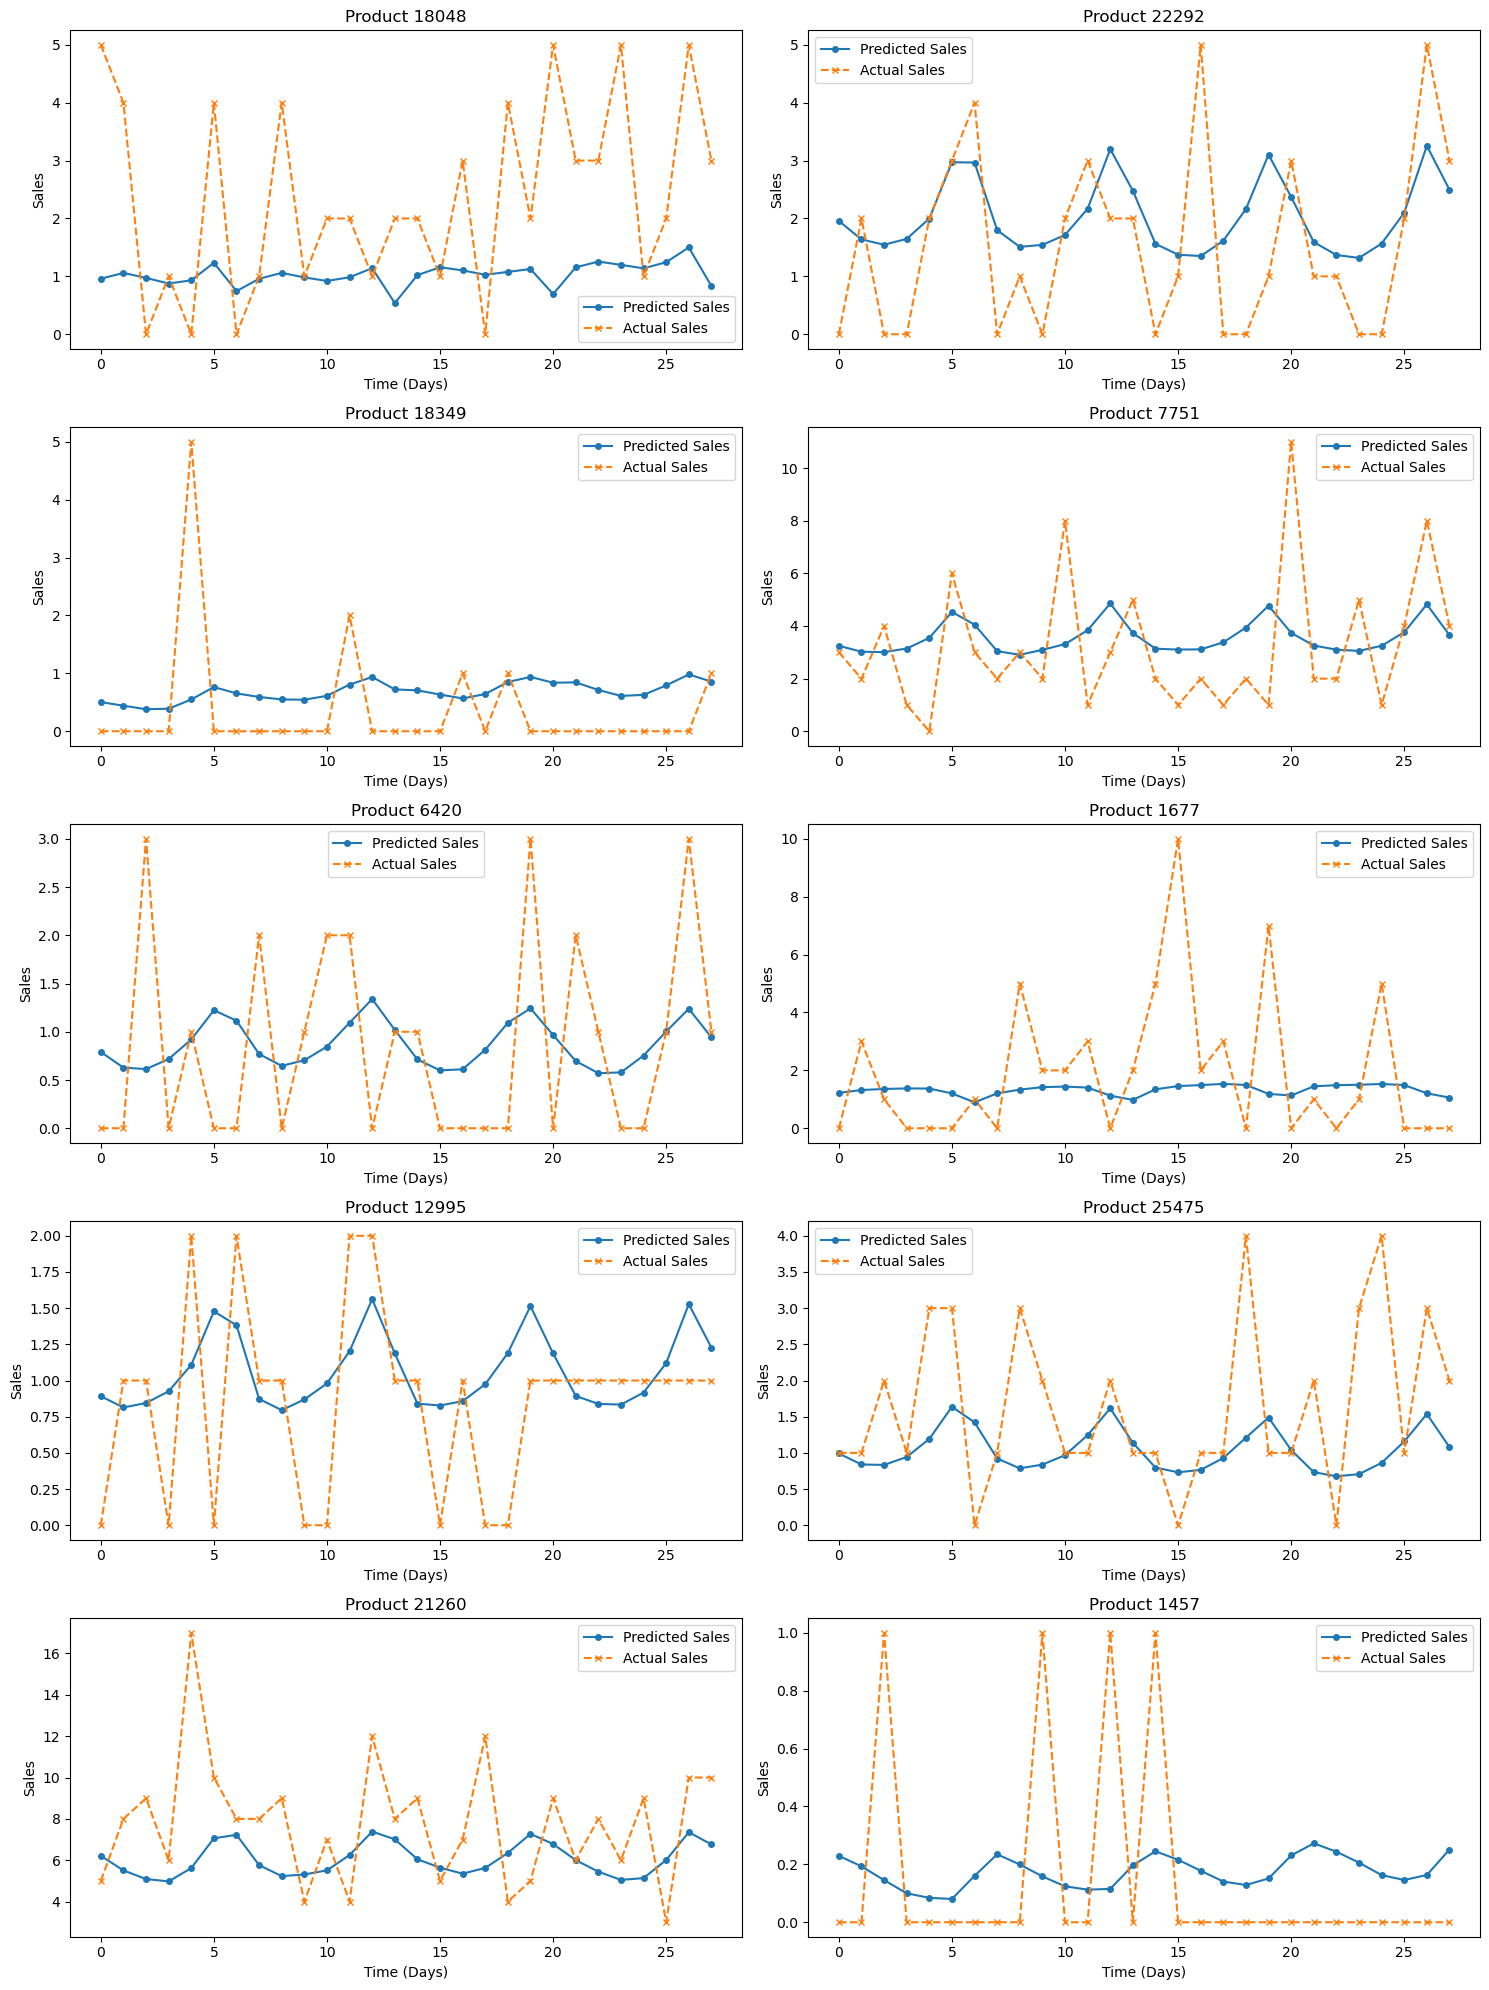

In [27]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(15, 20))

# Create a subplot for each selected product
for i, idx in enumerate(random_indices, 1):
    plt.subplot(5, 2, i)  # Adjust subplot layout based on your preference
    plt.plot(predicted_validation_inv[:, idx], label='Predicted Sales', marker='o', linestyle='-', markersize=4)
    plt.plot(y_val_inv[:, idx], label='Actual Sales', marker='x', linestyle='--', markersize=4)
    plt.title(f'Product {idx+1}')
    plt.xlabel('Time (Days)')
    plt.ylabel('Sales')
    plt.legend()

plt.tight_layout()
plt.show()

In [28]:
# Specify the index for the product you're interested in
product_index = 2426  # For product number 2427

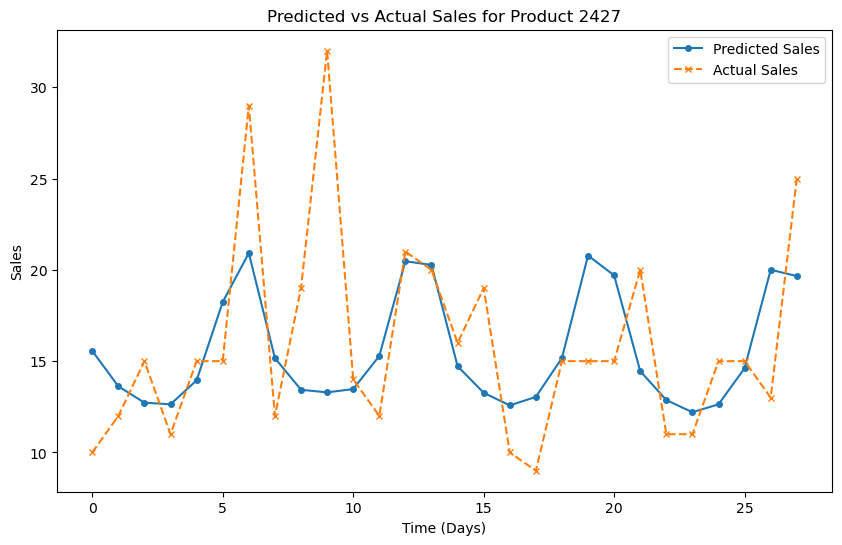

In [29]:
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot Predicted Sales for the specified product
plt.plot(predicted_validation_inv[:, product_index], label='Predicted Sales', marker='o', linestyle='-', markersize=4)
# Plot Actual Sales for the specified product
plt.plot(y_val_inv[:, product_index], label='Actual Sales', marker='x', linestyle='--', markersize=4)

plt.title(f'Predicted vs Actual Sales for Product {product_index + 1}')
plt.xlabel('Time (Days)')
plt.ylabel('Sales')
plt.legend()

plt.show()

In [30]:
# Extract predicted sales for the specified product
predicted_sales_specific_product = predicted_validation_inv[:, product_index]

# Extract actual sales for the specified product
actual_sales_specific_product = y_val_inv[:, product_index]

# Create a DataFrame to display predicted vs actual sales
sales_comparison_df = pd.DataFrame({
    'Predicted Sales': predicted_sales_specific_product,
    'Actual Sales': actual_sales_specific_product
})

print(sales_comparison_df)

    Predicted Sales  Actual Sales
0         15.560927          10.0
1         13.620581          12.0
2         12.726307          15.0
3         12.636050          11.0
4         13.952426          15.0
5         18.241018          15.0
6         20.917856          29.0
7         15.167814          12.0
8         13.433444          19.0
9         13.290394          32.0
10        13.472035          14.0
11        15.284194          12.0
12        20.472138          21.0
13        20.267930          20.0
14        14.724477          16.0
15        13.268505          19.0
16        12.577270          10.0
17        13.043712           9.0
18        15.171012          15.0
19        20.784593          15.0
20        19.695264          15.0
21        14.452107          20.0
22        12.869728          11.0
23        12.203240          11.0
24        12.635706          15.0
25        14.614760          15.0
26        20.005673          13.0
27        19.659243          25.0
